In [2]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd

In [16]:
Distribution_data = pd.read_csv('/Users/pc/Desktop/ev_distribution_dataset.csv')


In [17]:
Distribution_data = pd.read_csv('/Users/pc/Desktop/ev_distribution_dataset.csv')



In [18]:
Geospatial_data = pd.read_csv('/Users/pc/Desktop/geospatial_dataset.csv')

In [19]:
Weather_data = pd.read_csv('/Users/pc/Desktop/weather_dataset.csv')

In [21]:
Distribution_data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Location,EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
1,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
3,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907


In [22]:
Geospatial_data.head()

,Substation_ID,Substation_Location,Transmission_Line_Capacity (MW)
0,Substation_907,"(57.25813554648914, -70.90582041775649)",40
1,Substation_218,"(70.02538473360673, -84.38057237161145)",71
2,Substation_339,"(80.39323542610704, -75.79784143914193)",85
3,Substation_773,"(49.12307771334813, -87.3598904388042)",10
4,Substation_349,"(66.79887060665365, -86.51124108848195)",40


In [23]:
Weather_data.head()

,Timestamp,Temperature (°C),Precipitation (mm),Weather_Conditions,Substation_ID
0,2020-01-03 11:00:00,28.865989,0.313611,Snowy,Substation_744
1,2020-01-03 17:00:00,28.902260,0.817728,Clear,Substation_516
2,2020-01-04 04:00:00,24.212651,4.516506,Clear,Substation_261
3,2020-01-04 23:00:00,29.024606,3.821278,Snowy,Substation_560
4,2020-01-05 00:00:00,24.126655,4.965771,Snowy,Substation_258


In [26]:
#check data types and missing values
Distribution_data.info()  # Changed from Info() to info() - pandas methods are case-sensitive

#Description of numerical columns
Distribution_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           500 non-null    object 
 1   Geographical_Area                   500 non-null    object 
 2   Customer_Type                       500 non-null    object 
 3   Electricity_Consumption (kWh)       500 non-null    float64
 4   EV_Charging_Station_Location        500 non-null    object 
 5   EV_Charging_Station_Specifications  500 non-null    object 
 6   EV_Type                             500 non-null    object 
 7   Charging_Habit                      500 non-null    object 
 8   Number_of_EVs                       500 non-null    int64  
 9   Substation_ID                       500 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 39.2+ KB


,Electricity_Consumption (kWh),Number_of_EVs
count,500.000000,500.000000
mean,506.188554,5.240000
std,80.251238,2.577535
min,315.912577,1.000000
25%,439.978312,3.000000
50%,505.820872,5.000000
75%,557.230712,8.000000
max,718.980293,9.000000


In [27]:
#check data types and missing values
Geospatial_data.info()  # Changed from Info() to info() - pandas methods are case-sensitive

#Description of numerical columns
Geospatial_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Substation_ID                    50 non-null     object
 1   Substation_Location              50 non-null     object
 2   Transmission_Line_Capacity (MW)  50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


,Transmission_Line_Capacity (MW)
count,50.000000
mean,52.740000
std,24.857808
min,10.000000
25%,33.250000
50%,51.500000
75%,74.750000
max,94.000000


In [28]:
#check data types and missing values
Weather_data.info() 

#Description of numerical columns
Weather_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           97 non-null     object 
 1   Temperature (°C)    97 non-null     float64
 2   Precipitation (mm)  97 non-null     float64
 3   Weather_Conditions  97 non-null     object 
 4   Substation_ID       97 non-null     object 
dtypes: float64(2), object(3)
memory usage: 3.9+ KB


,Temperature (°C),Precipitation (mm)
count,97.000000,97.000000
mean,25.311668,2.542096
std,4.821917,1.396957
min,12.449425,0.007923
25%,22.245088,1.390244
50%,25.248302,2.688862
75%,28.902260,3.656106
max,34.104493,4.965771


Exploratory Data Analysis
This involves both univariate and Business Analysis

1 Univariate Analysis
- visualize the distribution of electricity consumption
- -analyze the distribution of ev types ,charging habits and customer type

2 Bivariate Analysis
-Use geospatial data to visualize location of sunstations and ev charging stations
- Analyze capacity of transmission lines


Univariate Analysis

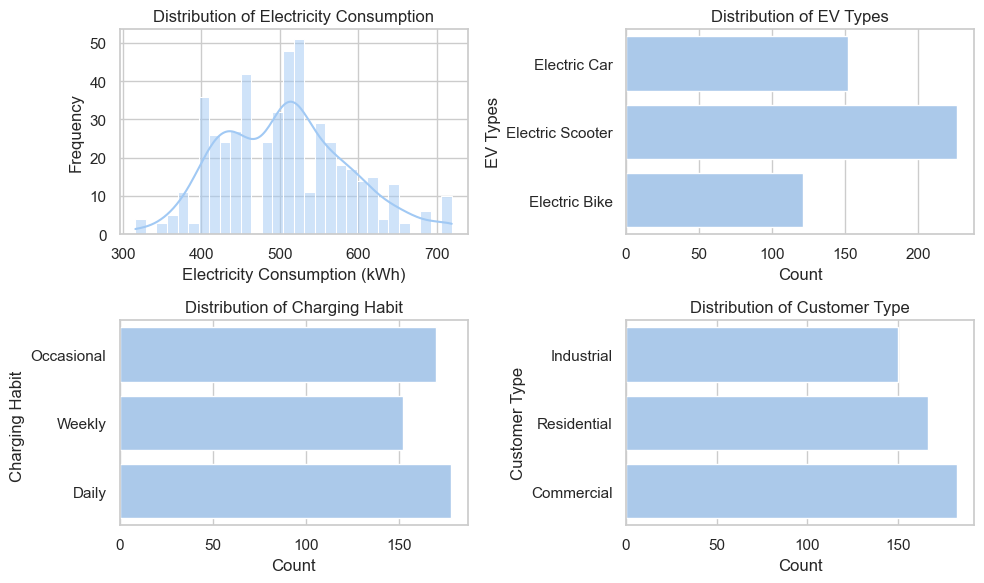

In [32]:

# setting the style and colour pallet
sns.set(style = "whitegrid")
sns.set_palette("pastel")

#creating a 2 x 2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(10, 6))



#plot for distribution of electricity consumption
sns.histplot(data=Distribution_data, x='Electricity_Consumption (kWh)', bins=30, kde=True, ax=axes[0, 0])
axes[0,0].set_title("Distribution of Electricity Consumption")
axes[0,0].set_xlabel("Electricity Consumption (kWh)")
axes[0,0].set_ylabel("Frequency")

#plot for distribution of ev types
sns.countplot(data=Distribution_data, y='EV_Type', ax=axes[0, 1])
axes[0,1].set_title("Distribution of EV Types")
axes[0,1].set_xlabel("Count")
axes[0,1].set_ylabel("EV Types")

#plot for distribution of charging habits
sns.countplot(data=Distribution_data, y='Charging_Habit', ax=axes[1, 0])
axes[1,0].set_title("Distribution of Charging Habit")  
axes[1,0].set_xlabel("Count")
axes[1,0].set_ylabel("Charging Habit ")

#plot for distribution of customer types
sns.countplot(data=Distribution_data, y='Customer_Type', ax=axes[1, 1])
axes[1,1].set_title("Distribution of Customer Type")
axes[1,1].set_xlabel("Count")
axes[1,1].set_ylabel("Customer Type")

#layout adjustment
plt.tight_layout()

#show the plots
plt.show()

Bivariate Analysis

In [41]:
print("Distribution_data columns:", Distribution_data.columns.tolist())
print("Geospatial_data columns:", Geospatial_data.columns.tolist())


Distribution_data columns: ['Timestamp', 'Geographical_Area', 'Customer_Type', 'Electricity_Consumption (kWh)', 'EV_Charging_Station_Specifications', 'EV_Type', 'Charging_Habit', 'Number_of_EVs', 'Substation_ID', 'ev_latitude', 'ev_longitude']
Geospatial_data columns: ['Substation_ID', 'Transmission_Line_Capacity (MW)', 'substation_latitude', 'substation_longitude']


In [42]:
Geospatial_data.head()

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude
0,Substation_907,40,57.258136,-70.905820
1,Substation_218,71,70.025385,-84.380572
2,Substation_339,85,80.393235,-75.797841
3,Substation_773,10,49.123078,-87.359890
4,Substation_349,40,66.798871,-86.511241


In [43]:
Distribution_data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID,ev_latitude,ev_longitude
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
1,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
3,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 28.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [contextily]8 [geopy]io]


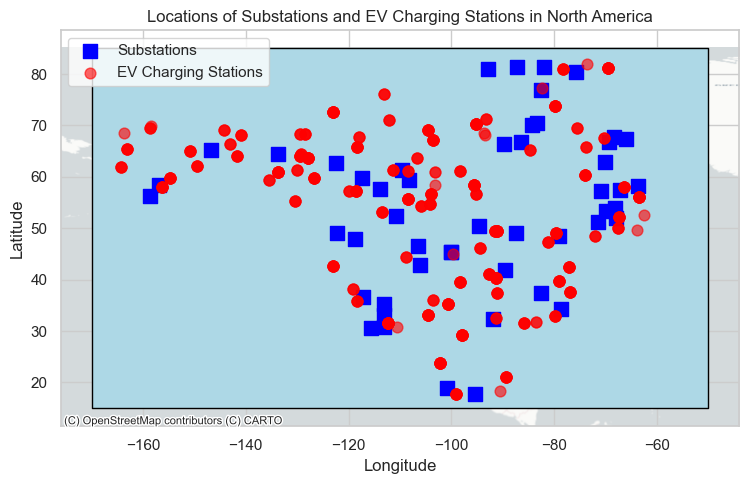

In [47]:

# installing the required package
!pip install contextily

# Import necessary libraries
import contextily as ctx
from shapely.geometry import box
import geopandas as gpd
import matplotlib.pyplot as plt

# Convert the DataFrames to GeoDataFrames
ev_gdf = gpd.GeoDataFrame(
    Distribution_data,
    geometry=gpd.points_from_xy(Distribution_data.ev_longitude, Distribution_data.ev_latitude)
)

substation_gdf = gpd.GeoDataFrame(
    Geospatial_data,
    geometry=gpd.points_from_xy(Geospatial_data.substation_longitude, Geospatial_data.substation_latitude)
)

# Creating a world map 
# Define the bounding box for North America
north_america_bbox = box(-170, 15, -50, 85)  # Approximate bounds for North America

# Create a base GeoDataFrame for North America
north_america = gpd.GeoDataFrame({'geometry': [north_america_bbox]}, crs="EPSG:4326")

# Plotting map for North America
fig, ax = plt.subplots(figsize=(10, 5))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Add a basemap for context
ctx.add_basemap(ax, crs=north_america.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Plotting the substations on the map
substation_gdf.plot(ax=ax, marker='s', markersize=100, color='blue', label='Substations')

# Plotting EV charging stations on the map
ev_gdf.plot(ax=ax, marker='o', markersize=60, color='red', label='EV Charging Stations', alpha=0.6)

# Set title and axis labels
plt.title('Locations of Substations and EV Charging Stations in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()

In [49]:
!pip install geodatasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [geodatasets]


In [58]:
from shapely.geometry import LineString

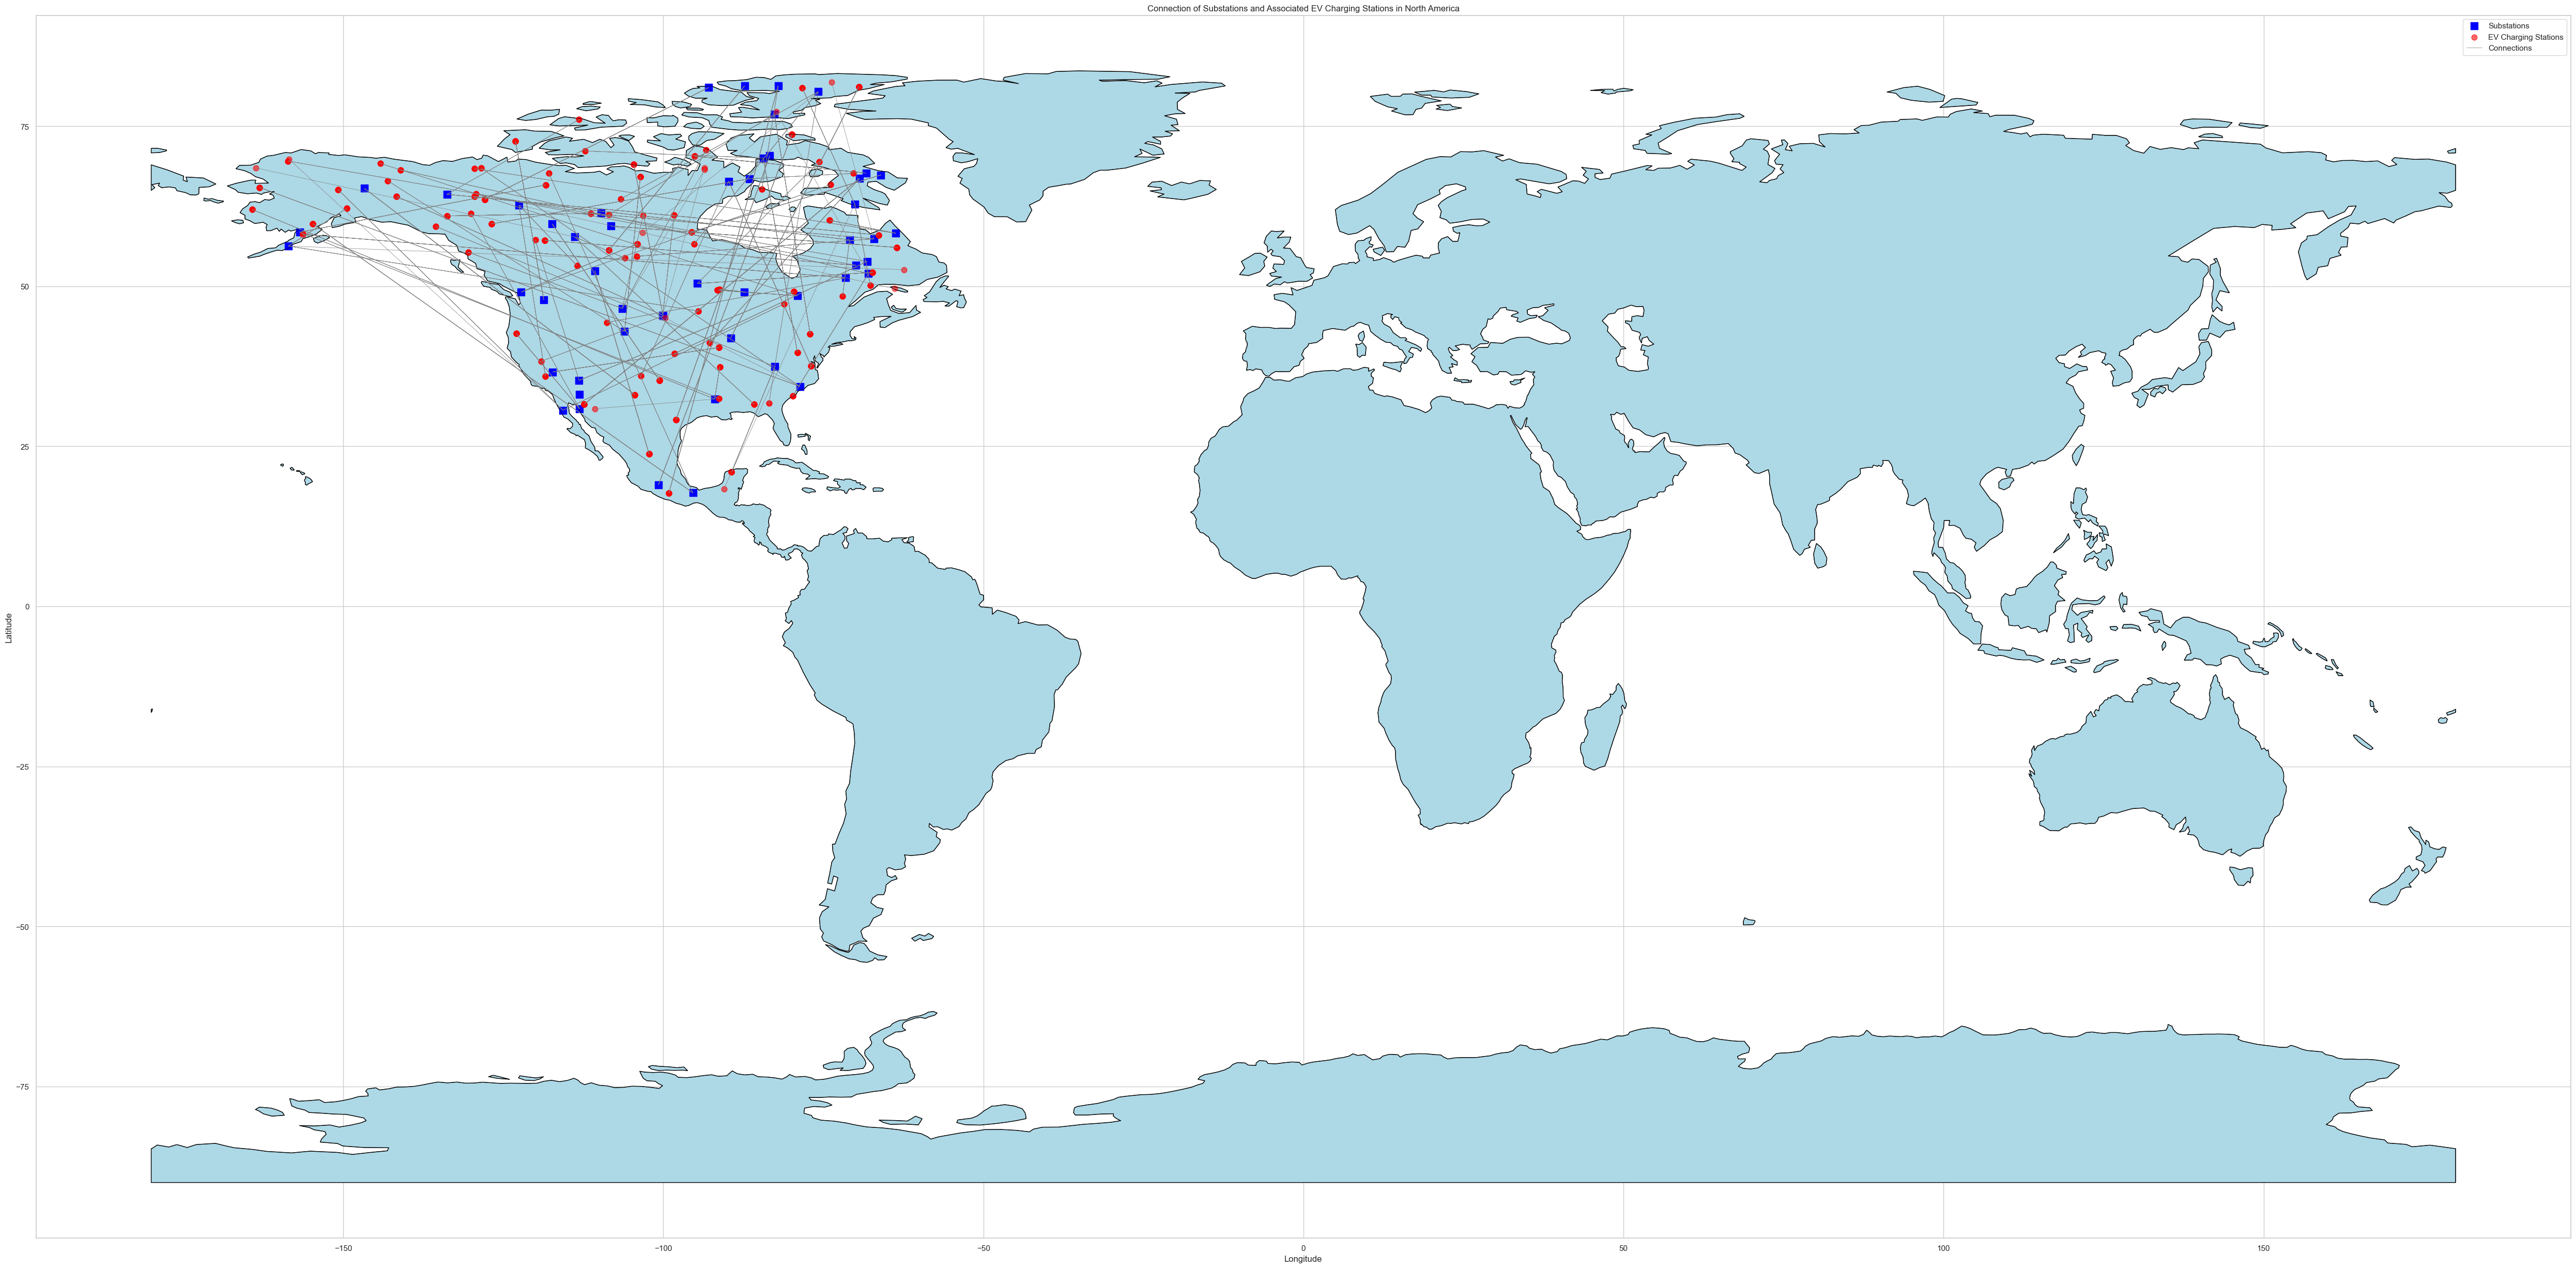

In [84]:

import matplotlib.pyplot as plt
import geopandas as gpd  
import geodatasets
from shapely.geometry import LineString  



world = gpd.read_file(geodatasets.get_path('naturalearth.land'))


# Convert the DataFrames to GeoDataFrames
ev_gdf = gpd.GeoDataFrame(
    Distribution_data,
    geometry=gpd.points_from_xy(Distribution_data.ev_longitude, Distribution_data.ev_latitude)
)

substation_gdf = gpd.GeoDataFrame(
    Geospatial_data,
    geometry=gpd.points_from_xy(Geospatial_data.substation_longitude, Geospatial_data.substation_latitude)
)

# Create lines connecting each substation to its associated EV charging station
lines = []
for _, ev_row in Distribution_data.iterrows():
    # Find the matching substation
    sub_match = Geospatial_data[Geospatial_data['Substation_ID'] == ev_row['Substation_ID']]
    if not sub_match.empty:
        substation = sub_match.iloc[0]
        line = LineString([
            (ev_row['ev_longitude'], ev_row['ev_latitude']),
            (substation['substation_longitude'], substation['substation_latitude'])
        ])
        lines.append(line)

# Create GeoDataFrame for lines
line_gdf = gpd.GeoDataFrame(geometry=lines)

#  using naturalearth_lowres, filter to North America
if 'continent' in world.columns:
    north_america = world[world['continent'] == "North America"]
else:
    north_america = world

# Plotting map for North America
fig, ax = plt.subplots(figsize=(50, 25))
north_america.plot(ax=ax, color='lightblue', edgecolor='black')
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')

# Plot substations
substation_gdf.plot(ax=ax, marker='s', markersize=100, color='blue', label='Substations')

# Plot EV charging stations
ev_gdf.plot(ax=ax, marker='o', markersize=60, color='red', label='EV Charging Stations', alpha=0.6)

# Plot connecting lines
line_gdf.plot(ax=ax, linewidth=0.5, color='gray', label='Connections')

# Set title and axis labels
plt.title('Connection of Substations and Associated EV Charging Stations in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()

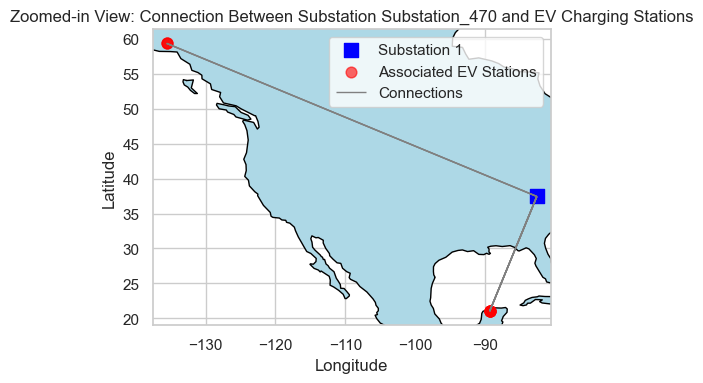

In [81]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import geodatasets

# Filter for the first substation
selected_substation = Geospatial_data.iloc[49]
associated_ev = Distribution_data[Distribution_data['Substation_ID'] == selected_substation['Substation_ID']]

# Convert to GeoDataFrames
ev_gdf_selected = gpd.GeoDataFrame(
    associated_ev,
    geometry=gpd.points_from_xy(associated_ev.ev_longitude, associated_ev.ev_latitude)
)

substation_gdf_selected = gpd.GeoDataFrame(
    selected_substation.to_frame().T,
    geometry=gpd.points_from_xy(
        [selected_substation['substation_longitude']],
        [selected_substation['substation_latitude']]
    )
)

# Create connecting lines
lines_selected = [
    LineString([
        (ev_row['ev_longitude'], ev_row['ev_latitude']),
        (selected_substation['substation_longitude'], selected_substation['substation_latitude'])
    ])
    for _, ev_row in associated_ev.iterrows()
]

line_gdf_selected = gpd.GeoDataFrame(geometry=lines_selected)

# Load base map using 
world = gpd.read_file(geodatasets.get_path('naturalearth.land'))

#  Determine bounding box and apply zoom
buffer = 2  # degrees of padding
minx, miny, maxx, maxy = line_gdf_selected.total_bounds
xlim = (minx - buffer, maxx + buffer)
ylim = (miny - buffer, maxy + buffer)

#  Plotting
fig, ax = plt.subplots(figsize=(6, 4))
world.plot(ax=ax, color='lightblue', edgecolor='black')

# Plot substation, EV stations, and connection lines
substation_gdf_selected.plot(ax=ax, marker='s', markersize=100, color='blue', label='Substation 1')
ev_gdf_selected.plot(ax=ax, marker='o', markersize=60, color='red', label='Associated EV Stations', alpha=0.6)
line_gdf_selected.plot(ax=ax, linewidth=1, color='gray', label='Connections')

# Apply zoom
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Title and labels
plt.title(f"Zoomed-in View: Connection Between Substation {selected_substation['Substation_ID']} and EV Charging Stations")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()


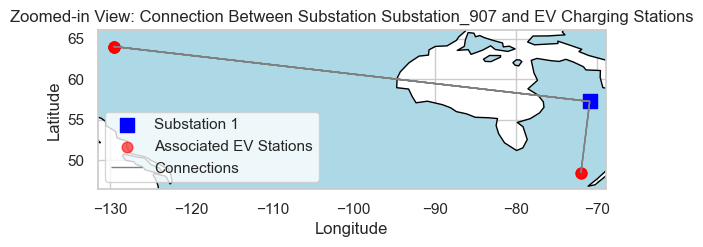

In [80]:


# Step 1: Filter for the first substation
selected_substation = Geospatial_data.iloc[0]
associated_ev = Distribution_data[Distribution_data['Substation_ID'] == selected_substation['Substation_ID']]

# Step 2: Convert to GeoDataFrames
ev_gdf_selected = gpd.GeoDataFrame(
    associated_ev,
    geometry=gpd.points_from_xy(associated_ev.ev_longitude, associated_ev.ev_latitude)
)

substation_gdf_selected = gpd.GeoDataFrame(
    selected_substation.to_frame().T,
    geometry=gpd.points_from_xy(
        [selected_substation['substation_longitude']],
        [selected_substation['substation_latitude']]
    )
)

# Step 3: Create connecting lines
lines_selected = [
    LineString([
        (ev_row['ev_longitude'], ev_row['ev_latitude']),
        (selected_substation['substation_longitude'], selected_substation['substation_latitude'])
    ])
    for _, ev_row in associated_ev.iterrows()
]

line_gdf_selected = gpd.GeoDataFrame(geometry=lines_selected)

# Step 4: Load base map using valid dataset
world = gpd.read_file(geodatasets.get_path('naturalearth.land'))

# Step 5: Determine bounding box and apply zoom
buffer = 2  # degrees of padding
minx, miny, maxx, maxy = line_gdf_selected.total_bounds
xlim = (minx - buffer, maxx + buffer)
ylim = (miny - buffer, maxy + buffer)

# Step 6: Plotting
fig, ax = plt.subplots(figsize=(6, 4))
world.plot(ax=ax, color='lightblue', edgecolor='black')

# Plot substation, EV stations, and connection lines
substation_gdf_selected.plot(ax=ax, marker='s', markersize=100, color='blue', label='Substation 1')
ev_gdf_selected.plot(ax=ax, marker='o', markersize=60, color='red', label='Associated EV Stations', alpha=0.6)
line_gdf_selected.plot(ax=ax, linewidth=1, color='gray', label='Connections')

# Apply zoom
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Title and labels
plt.title(f"Zoomed-in View: Connection Between Substation {selected_substation['Substation_ID']} and EV Charging Stations")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()

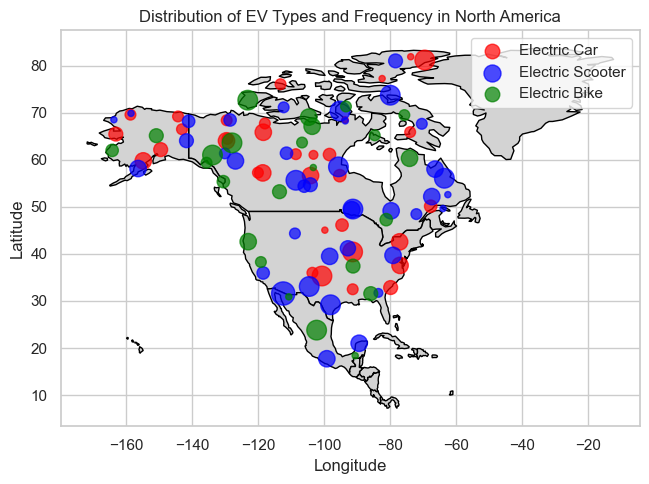

In [91]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import to_rgba

#  Normalize EV types
Distribution_data['EV_Type'] = Distribution_data['EV_Type'].str.strip().str.title()

#  Group by location and EV type
grouped_data = Distribution_data.groupby(
    ['ev_latitude', 'ev_longitude', 'EV_Type']
).size().reset_index(name='count')

#Convert to GeoDataFrame
grouped_gdf = gpd.GeoDataFrame(
    grouped_data,
    geometry=gpd.points_from_xy(grouped_data.ev_longitude, grouped_data.ev_latitude),
    crs="EPSG:4326"
)

#  Load world map
world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")
north_america = world[world['CONTINENT'] == "North America"]

#  Define EV type colors
colors = {
    'Electric Car': 'red',
    'Electric Scooter': 'blue',
    'Electric Bike': 'green'
}

#  Plotting
fig, ax = plt.subplots(figsize=(10, 5))
north_america.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot each EV type
for ev_type, color in colors.items():
    sub_gdf = grouped_gdf[grouped_gdf['EV_Type'] == ev_type]
    if not sub_gdf.empty:
        sub_gdf.plot(
            ax=ax,
            markersize=sub_gdf['count'] * 20,
            color=color,
            label=ev_type,
            alpha=0.7
        )

# plot
plt.title('Distribution of EV Types and Frequency in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()


Network Capacity Assesment
1 calculate the total electricity consumption for each substation
2 comparing total electricity comsumption with the transmissiom line capacity



In [92]:
# Group the EV distribution data by Substation_ID and calculate total electricity consumption
total_consumption_per_substation = Distribution_data.groupby('Substation_ID')['Electricity_Consumption (kWh)'].sum().reset_index()

# Merge with geospatial data on Substation_ID
network_capacity_data = pd.merge(
    Geospatial_data,
    total_consumption_per_substation,
    on='Substation_ID'
)

# Rename the column for clarity
network_capacity_data.rename(
    columns={'Electricity_Consumption (kWh)': 'Total_consumption (kWh)'},
    inplace=True
)

# Calculate the ratio of total consumption to transmission line capacity (1 MW = 1000 kWh)
network_capacity_data['Consumption_to_Capacity_Ratio'] = (
    network_capacity_data['Total_consumption (kWh)'] / 
    (network_capacity_data['Transmission_Line_Capacity (MW)'] * 1000)
)


In [93]:
network_capacity_data.head()

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total_consumption (kWh),Consumption_to_Capacity_Ratio
0,Substation_907,40,57.258136,-70.905820,6663.768920,0.166594
1,Substation_218,71,70.025385,-84.380572,5997.437051,0.084471
2,Substation_339,85,80.393235,-75.797841,4536.778685,0.053374
3,Substation_773,10,49.123078,-87.359890,4426.337993,0.442634
4,Substation_349,40,66.798871,-86.511241,4901.836555,0.122546


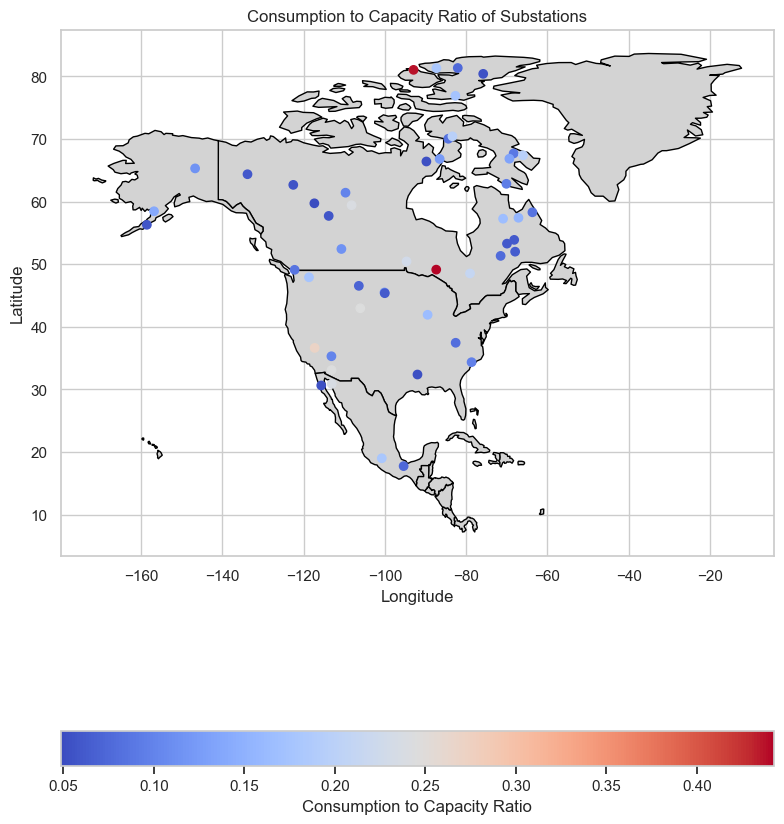

In [95]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Create GeoDataFrame for the substations
geometry_network_capacity = [
    Point(lon, lat)
    for lon, lat in zip(network_capacity_data['substation_longitude'], network_capacity_data['substation_latitude'])
]

gdf_network_capacity = gpd.GeoDataFrame(network_capacity_data, geometry=geometry_network_capacity, crs="EPSG:4326")

# Load world data for background
world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")
north_america = world[world['CONTINENT'] == "North America"]

# Plot choropleth
fig, ax = plt.subplots(figsize=(8, 12))
north_america.plot(ax=ax, color='lightgray', edgecolor='black')

gdf_network_capacity.plot(
    column='Consumption_to_Capacity_Ratio',
    cmap='coolwarm',
    legend=True,
    ax=ax,
    legend_kwds={'label': "Consumption to Capacity Ratio", 'orientation': "horizontal"}
)

# Titles and labels
ax.set_title("Consumption to Capacity Ratio of Substations")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()
plt.show()


In [96]:
# Group by Substation_ID to get the total number of EVs
ev_counts = Distribution_data.groupby('Substation_ID')['Number_of_EVs'].sum().reset_index()

# Merge with existing network capacity data
final_data = pd.merge(ev_counts, network_capacity_data, on='Substation_ID')

# Calculate correlation between number of EVs and consumption-to-capacity ratio
correlation_ratio = final_data['Number_of_EVs'].corr(final_data['Consumption_to_Capacity_Ratio'])

# Print the result
print(f"Correlation between Number of EVs and Consumption-to-Capacity Ratio: {correlation_ratio:.4f}")


Correlation between Number of EVs and Consumption-to-Capacity Ratio: -0.1094


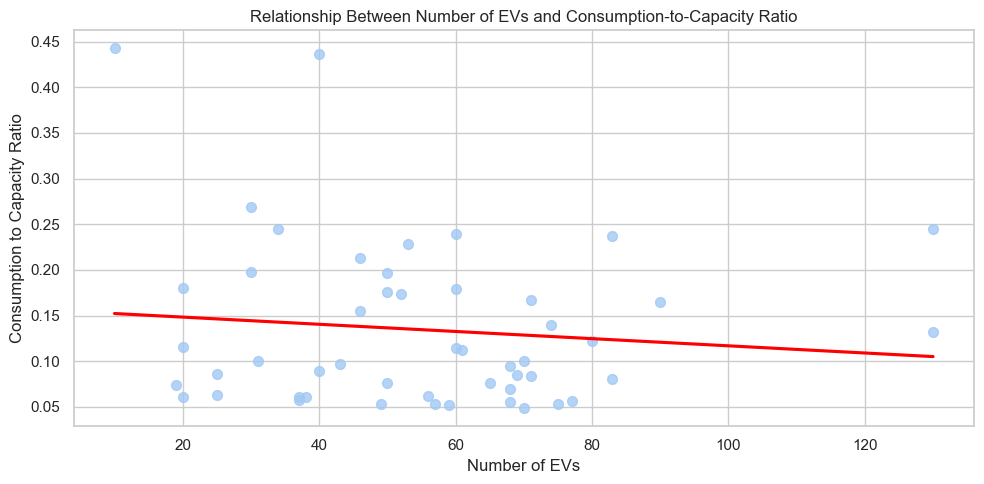

In [98]:
# Scatter plot with regression line
plt.figure(figsize=(10, 5))
sns.regplot(
    x='Number_of_EVs',
    y='Consumption_to_Capacity_Ratio',
    data=final_data,
    scatter_kws={'s': 50},
    line_kws={'color': 'red'},
    ci= None
)

plt.title('Relationship Between Number of EVs and Consumption-to-Capacity Ratio')
plt.xlabel('Number of EVs')
plt.ylabel('Consumption to Capacity Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

Identifying bottlenecks
-By analyzing the map, we can identify substataions and areas that are pottential bottlenecks in the distribution network. These areas where the consumption is high.


In [101]:
#filtering c2c graeter than 1
bottleneck_substation = network_capacity_data[network_capacity_data['Consumption_to_Capacity_Ratio']>= 0.9]


In [102]:
#diploying
bottleneck_substation

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total_consumption (kWh),Consumption_to_Capacity_Ratio


Optimizing network Upgrade

For Optimizing network upgrade, the focus is on substations with potential to have high Consumption to Capacity Ratio.Upgrading the transmission lines or adding additional capacity in theses areas can help in managing then potential of increased load efficiency and ensuring grid reliability.

also from the analysis,
- the grographical distribution of EV charging stations are quite far from the substation

The business also needs to look in to :
-Potential future growth in EV adoption in different areas
-costs associated with different upgrade options



In [106]:
# Top 5 substations nearing or exceeding overload
top_5_substations = network_capacity_data.nlargest(5, 'Consumption_to_Capacity_Ratio')
top_5_substations


,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total_consumption (kWh),Consumption_to_Capacity_Ratio
3,Substation_773,10,49.123078,-87.359890,4426.337993,0.442634
14,Substation_87,12,81.031814,-92.941747,5243.800714,0.436983
26,Substation_711,17,36.618181,-117.277556,4579.354677,0.269374
46,Substation_11,43,33.082269,-113.118931,10534.827701,0.244996
41,Substation_258,22,42.952789,-106.049333,5378.214378,0.244464


In [109]:


# Merge Distribution and Weather data on both Timestamp and Substation_ID
merged_data = pd.merge(Distribution_data, Weather_data, on=['Timestamp', 'Substation_ID'])
# Calculate correlation between weather and electricity consumption
correlation_matrix = merged_data[
    ['Electricity_Consumption (kWh)', 'Temperature (°C)', 'Precipitation (mm)']
].corr()
# Display result
correlation_matrix










,Electricity_Consumption (kWh),Temperature (°C),Precipitation (mm)
Electricity_Consumption (kWh),1.000000,0.131543,0.085014
Temperature (°C),0.131543,1.000000,-0.005828
Precipitation (mm),0.085014,-0.005828,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

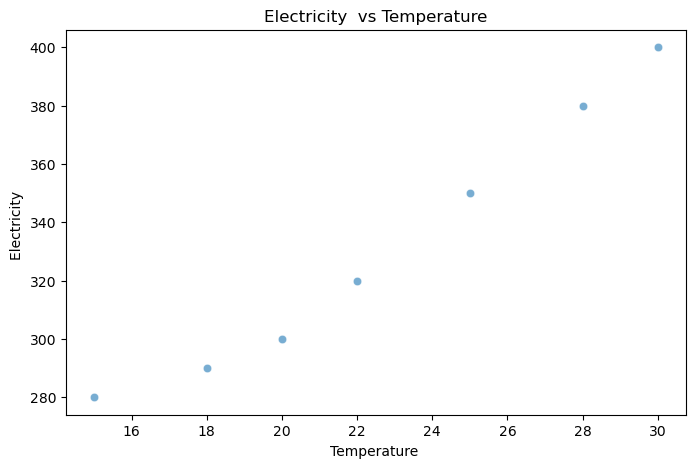

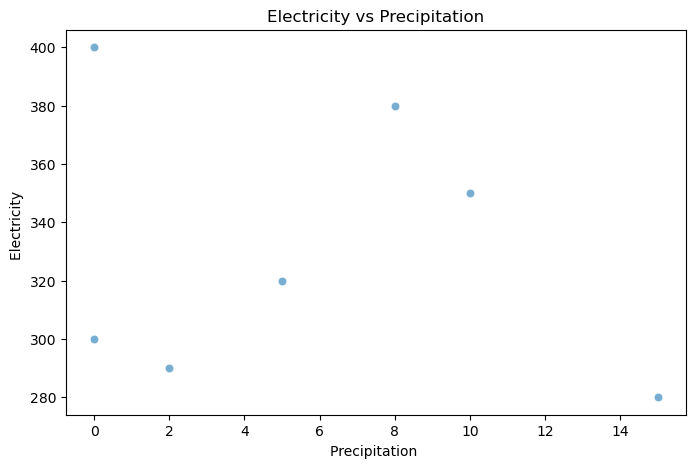

In [8]:

# Electricity consumption vs Temperature
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_data, x='Temperature (°C)', y='Electricity_Consumption (kWh)', alpha=0.6)
plt.title("Electricity  vs Temperature")
plt.xlabel("Temperature ")
plt.ylabel("Electricity ")
plt.show

# Electricity consumption vs Precipitation
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_data, x='Precipitation (mm)', y='Electricity_Consumption (kWh)', alpha=0.6)
plt.title("Electricity vs Precipitation")
plt.xlabel("Precipitation ")
plt.ylabel("Electricity ")
plt.show

This is based on the analysis done and the business problems at hand,all these should be incorporated into the business.

1. Prioritize substation Upgrade:  Prioritize Upgrades at substations where the Consumption_to_Capacity_Ratio is high, indicating potential overloads. Upgrade the transmission lines because the EV charging stations are too far from the corresponding Substations.
2. Geospatial Analysis for Upgrade Planning: Use grospatial analysis tp detremine the optimal location for new substations or upgrades to existing ones. Consider factors like the proximity to high load demand areas (areas with high consumption to capacity ratio) and geographical constraints
3. Demand side management: Implement demand side management strategies to balance the load on the grid. Encourage customers toi charge their EVs during off peak hours through incentives of dynamic pricing.
4. Advanced Monitoring and analytics :Deploy advanced monitoring systems to continously monitor the health and performance of the distribution network. Use analytics to predict potential issues and take preventive action
5. Cost Benefit Analysis:  conduct a comprehensive cost benefit analysis for diffrent upgrade options. Consider factors like cost of upogrades, operational costs, potential revenue from increased capacity, and impact on service reliability and customer satisfaction.
6. Customer Engagement : Engage with customers to understand their needs and expectations. Provide clear communication and network upgrades and how they will enhance service reliabilituy and meet the growing demand for EV charging
   By following these steps, powercharge Utilities can develop an effective optimizatiuon to manage the increased load demand from EV charging stations, ensure the reliability and resilience of the distribution network, and meet the expectations of customers, all while optimizing costs and ensuring regulatory compliance.